In [3]:
from pandas import Series,DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [6]:
df=DataFrame(np.arange(16).reshape(4,4))
list1=['a','b','a','b']
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [9]:
#按列表分组
df.groupby(list1).sum()

,0,1,2,3
a,8,10,12,14
b,16,18,20,22


In [11]:
#按字典分组
df=DataFrame(np.random.normal(size=(6,6)),index=['a','b','c','A','B','C'])
df

,0,1,2,3,4,5
a,-0.947194,0.017060,0.230518,0.386817,-1.073997,0.458047
b,-0.729570,0.019319,1.687324,0.238417,1.164761,-1.165372
c,1.067252,0.470074,-0.827677,-0.790068,-0.426908,0.276517
A,0.343584,0.350451,0.528153,-0.370067,-0.629991,0.042826
B,0.415777,-0.045562,-0.425779,-0.218999,-0.661376,-0.340040
C,-0.236612,-2.541277,0.949585,-1.131489,-0.299660,0.275325


In [12]:
dict={'a':'one','A':'one','b':'two','B':'two','c':'three','C':'three'}
df.groupby(dict).sum()

,0,1,2,3,4,5
one,-0.603610,0.367510,0.758671,0.016750,-1.703989,0.500873
three,0.830640,-2.071203,0.121908,-1.921557,-0.726567,0.551842
two,-0.313792,-0.026243,1.261545,0.019418,0.503385,-1.505413


In [15]:
#按函数分类
df=DataFrame(np.random.randn(4,4))
df

,0,1,2,3
0,0.821884,-1.248451,-1.663412,-0.961608
1,-0.452416,0.909037,1.552509,0.541252
2,-0.071413,0.471642,-0.928099,0.508257
3,-0.537800,0.068638,1.490217,0.191529


In [16]:
def jug(x):
    if x>=0:
        return 'a'
    else:
        return 'b'

In [17]:
df[3].groupby(df[3].map(jug)).sum()

3
a    1.241038
b   -0.961608
Name: 3, dtype: float64

In [19]:
#索引级别分组
df=DataFrame(np.arange(16).reshape(4,4),index=[['one','one','two','two'],['a','b','a','b']],
            columns=[['apple','apple','orange','orange'],['red','green','red','green']])
df

apple       orange      
        red green    red green
one a     0     1      2     3
    b     4     5      6     7
two a     8     9     10    11
    b    12    13     14    15

In [20]:
df.groupby(level=1).sum()

apple       orange      
    red green    red green
a     8    10     12    14
b    16    18     20    22

In [21]:
#分位数计算
df=DataFrame(np.arange(16).reshape(4,4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [29]:
#list1=['a','b','a','b']
#df.groupby(list1).quantile(0.5)
df.sort_values(by=1,ascending=False)[0:3]


,0,1,2,3
3,12,13,14,15
2,8,9,10,11
1,4,5,6,7


In [23]:
def get_range(x):
    return x.max()-x.min()

In [30]:
def top(x,n=5):
    return x.sort_values(by='tip',ascending=False)[-n:]

# 综合例子：巴尔的摩公务员工资数据集

In [32]:
import numpy as np
import pandas as pd
%matplotlib inline

In [33]:
salary=pd.read_csv("/home/ysc/数据分析/data/第六讲/Baltimore_City_Employee_Salaries_FY2016.csv")
salary.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev (031),10/24/1979 12:00:00 AM,$56705.00,$54135.44
1,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29045,States Attorneys Office (045),09/25/2006 12:00:00 AM,$75500.00,$72445.87
2,"Abbey,Emmanuel",CONTRACT SERV SPEC II,A40001,M-R Info Technology (001),05/01/2013 12:00:00 AM,$60060.00,$59602.58
3,"Abbott-Cole,Michelle",Operations Officer III,A90005,TRANS-Traffic (005),11/28/2014 12:00:00 AM,$70000.00,$59517.21
4,"Abdal-Rahim,Naim A",EMT Firefighter Suppression,A64120,Fire Department (120),03/30/2011 12:00:00 AM,$64365.00,$74770.82


In [ ]:
#本次分析中，围绕工资提出几个问题
# 1.年薪的分布情况
# 公务人员入职日期的情况
# 年薪最高的职务和人数最多的职位
# Name	(姓名)JobTitle	（职位名称）-AgencyID（工号）	Agency（单位）
# HireDate（入职日期）	AnnualSalary（年薪）	GrossPay（总薪资）

In [36]:
#对数值进行简单描述看是否有缺失值
print(salary.shape)
salary.isnull().sum()

(13818, 7)


Name              0
JobTitle          0
AgencyID          0
Agency            0
HireDate          0
AnnualSalary      0
GrossPay        272
dtype: int64

In [37]:
#样本量充足，直接删除缺失值/根据职位分组插入均值
salary=salary.dropna()

In [39]:
salary.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
GrossPay        0
dtype: int64

In [41]:
#将工资结构中$符号去掉，转换为float
salary['AnnualSalary']=salary['AnnualSalary'].str.strip('$')
salary['GrossPay']=salary['GrossPay'].str.strip('$')
salary[['AnnualSalary','GrossPay']].head()

,AnnualSalary,GrossPay
0,56705.00,54135.44
1,75500.00,72445.87
2,60060.00,59602.58
3,70000.00,59517.21
4,64365.00,74770.82


In [43]:
salary['GrossPay']=salary['GrossPay'].astype(float)
salary['AnnualSalary']=salary['AnnualSalary'].astype(float)
salary['GrossPay'].dtype

dtype('float64')

In [45]:
#入职日期月份单独一列
salary['month']=salary['HireDate'].str.split('/').str[0]
salary[['HireDate','month']].head()

,HireDate,month
0,10/24/1979 12:00:00 AM,10
1,09/25/2006 12:00:00 AM,09
2,05/01/2013 12:00:00 AM,05
3,11/28/2014 12:00:00 AM,11
4,03/30/2011 12:00:00 AM,03


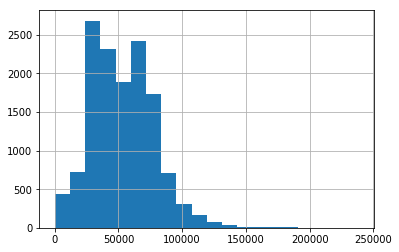

In [46]:
#年薪分布图
salary['AnnualSalary'].hist(bins=20)

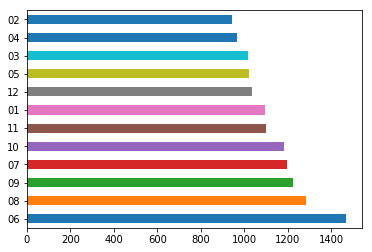

In [47]:
#入职月份分布情况
month_count=salary['month'].value_counts()
month_count.plot(kind='barh')

In [48]:
agg_salary=salary.groupby('JobTitle')['AnnualSalary'].agg(['mean','count'])
agg_salary

,mean,count
JobTitle,,
911 LEAD OPERATOR,49816.750000,4
911 OPERATOR,44829.461538,65
911 OPERATOR SUPERVISOR,57203.500000,4
ACCOUNT EXECUTIVE,57200.000000,4
ACCOUNTANT I,49065.866667,15
ACCOUNTANT II,58172.640000,25
ACCOUNTANT SUPV,67417.142857,7
ACCOUNTANT TRAINEE,36681.000000,1
ACCOUNTING ASST I,29226.333333,6


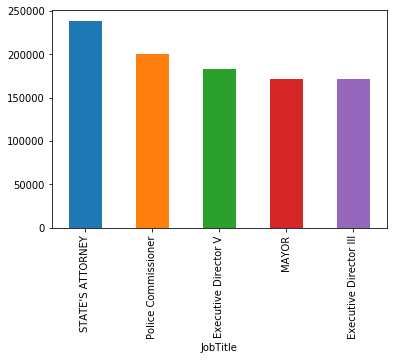

In [53]:
sort_salary=agg_salary.sort_values(by='mean',ascending=False)[:5]
sort_salary['mean'].plot(kind='bar')

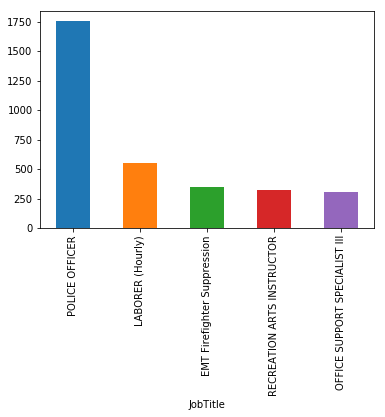

In [54]:
sort_count=agg_salary.sort_values(by='count',ascending=False)[:5]
sort_count['count'].plot(kind='bar')